In [1]:
import os

In [2]:
os.getcwd()

'c:\\Users\\KimYeonSang\\Desktop\\광인사\\D_L\\content'

In [12]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import os

import matplotlib.pyplot as plt
from PIL import Image

In [22]:
img=Image.open('C:/Users/KimYeonSang/Desktop/광인사/D_L/content/flowers/daisy/5673551_01d1ea993e_n.jpg')
print('img : ',img)

img :  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=320x212 at 0x21A54D85490>


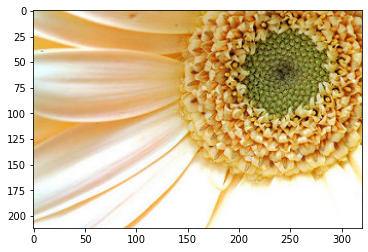

img_array.shape : 
 (212, 320, 3)
img_array : 
 [[[215 214 186]
  [214 210 181]
  [210 205 175]
  ...
  [213 176 105]
  [213 187 112]
  [207 188 111]]

 [[212 215 186]
  [212 212 184]
  [210 209 179]
  ...
  [205 159  82]
  [206 162  87]
  [208 164  89]]

 [[210 216 188]
  [210 214 187]
  [209 212 183]
  ...
  [192 140  56]
  [198 143  61]
  [214 155  75]]

 ...

 [[245 251 249]
  [246 252 250]
  [249 253 252]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[250 254 253]
  [250 254 253]
  [251 255 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[252 254 253]
  [252 254 253]
  [253 255 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [24]:
plt.imshow(img)
plt.show()

img_array = np.array(img)
print("img_array.shape : \n", img_array.shape)
print("img_array : \n", img_array)

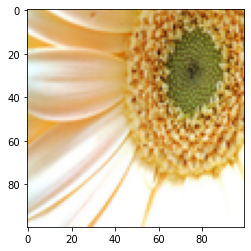

In [25]:
resized = img.resize([100,100])
plt.imshow(resized)
plt.show()
#plt.draw()

In [30]:
path='C:/Users/KimYeonSang/Desktop/광인사/D_L/content/flowers'
filenames = os.listdir(path)
print("filenames : ", filenames)

filenames :  ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [31]:
def list_dir(path):
    filenames = os.listdir(path)
    filenames.sort()
    return filenames

In [32]:
target_names = list_dir(path)
print("target_names : ", target_names)

target_names :  ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [35]:
for dx, dname in enumerate(target_names):
    print("dname : ",dname)

    subpath= path+'/'+dname 
    print("subpath :",subpath)

    filenames=list_dir(subpath)
    print(filenames[:3])


dname :  daisy
subpath : C:/Users/KimYeonSang/Desktop/광인사/D_L/content/flowers/daisy
['100080576_f52e8ee070_n.jpg', '10140303196_b88d3d6cec.jpg', '10172379554_b296050f82_n.jpg']
dname :  dandelion
subpath : C:/Users/KimYeonSang/Desktop/광인사/D_L/content/flowers/dandelion
['10043234166_e6dd915111_n.jpg', '10200780773_c6051a7d71_n.jpg', '10294487385_92a0676c7d_m.jpg']
dname :  rose
subpath : C:/Users/KimYeonSang/Desktop/광인사/D_L/content/flowers/rose
['10090824183_d02c613f10_m.jpg', '102501987_3cdb8e5394_n.jpg', '10503217854_e66a804309.jpg']
dname :  sunflower
subpath : C:/Users/KimYeonSang/Desktop/광인사/D_L/content/flowers/sunflower
['1008566138_6927679c8a.jpg', '1022552002_2b93faf9e7_n.jpg', '1022552036_67d33d5bd8_n.jpg']
dname :  tulip
subpath : C:/Users/KimYeonSang/Desktop/광인사/D_L/content/flowers/tulip
['100930342_92e8746431_n.jpg', '10094729603_eeca3f2cb6.jpg', '10094731133_94a942463c.jpg']


In [36]:
imagepath=os.path.join(subpath,filenames[3])
print(imagepath)

C:/Users/KimYeonSang/Desktop/광인사/D_L/content/flowers/tulip\10128546863_8de70c610d.jpg


In [55]:
def load_image_pixels(imagepath,resolution) :
    img=Image.open(imagepath)
    img_resized=img.resize(resolution)

    return np.array(img_resized)
resolution=[20,20]
pixels=load_image_pixels(os.path.join(subpath,filenames[3]),resolution)
print("pixels :\n",pixels)  #os.path.join(subpath,filenames[3])자체가 pixel로 출력

pixels :
 [[[131 167 199]
  [135 167 199]
  [142 172 202]
  ...
  [175 195 217]
  [176 195 216]
  [178 196 217]]

 [[175 128 175]
  [142 174 204]
  [151 179 207]
  ...
  [163 187 213]
  [167 189 213]
  [172 192 215]]

 [[204  79 146]
  [157 181 209]
  [160 186 211]
  ...
  [159 186 213]
  [162 186 212]
  [160 185 211]]

 ...

 [[ 33  45  14]
  [ 29  38  12]
  [ 39  49  21]
  ...
  [ 38  44  17]
  [ 29  40  14]
  [ 23  33   5]]

 [[ 24  36  11]
  [ 35  45  16]
  [ 29  40  18]
  ...
  [ 38  47  18]
  [ 17  26   8]
  [ 28  41  16]]

 [[ 25  34  13]
  [ 36  47  16]
  [ 41  53  25]
  ...
  [ 38  48  21]
  [ 11  18   4]
  [ 30  40  21]]]


In [42]:
def flowers_init(resolution) :
    list_dir(path)
    target_names=list_dir(path=path)

    images=[]
    idxs=[]
    #target_names= daisy,rose,tulip...
    #path=C:\Users\KimYeonSang\Desktop\광인사\D_L\content\flowers
    
    for dx, dname in enumerate(target_names):
        print("dname : ",dname)

        subpath= path+'/'+dname #dname=daisy,rose,tulip...
        print("subpath :",subpath)

        filenames=list_dir(subpath) #flowers안의 dname안의 사진
        print(filenames[:3]) #사진파일 3개

        for fname in filenames :
            if fname[-4:] !='.jpg' :
                continue
            imagepath=os.path.join(subpath,fname) #join= 합치기
            pixels = load_image_pixels(imagepath,resolution)

            images.append(pixels)
            idxs.append(dx)

    xs = np.array(images,dtype=np.float32)

    return xs, images, idxs

In [43]:
resolution = [100,100]
xs, images, idxs = flowers_init(resolution=resolution)

dname :  daisy
subpath : C:/Users/KimYeonSang/Desktop/광인사/D_L/content/flowers/daisy
['100080576_f52e8ee070_n.jpg', '10140303196_b88d3d6cec.jpg', '10172379554_b296050f82_n.jpg']
dname :  dandelion
subpath : C:/Users/KimYeonSang/Desktop/광인사/D_L/content/flowers/dandelion
['10043234166_e6dd915111_n.jpg', '10200780773_c6051a7d71_n.jpg', '10294487385_92a0676c7d_m.jpg']
dname :  rose
subpath : C:/Users/KimYeonSang/Desktop/광인사/D_L/content/flowers/rose
['10090824183_d02c613f10_m.jpg', '102501987_3cdb8e5394_n.jpg', '10503217854_e66a804309.jpg']
dname :  sunflower
subpath : C:/Users/KimYeonSang/Desktop/광인사/D_L/content/flowers/sunflower
['1008566138_6927679c8a.jpg', '1022552002_2b93faf9e7_n.jpg', '1022552036_67d33d5bd8_n.jpg']
dname :  tulip
subpath : C:/Users/KimYeonSang/Desktop/광인사/D_L/content/flowers/tulip
['100930342_92e8746431_n.jpg', '10094729603_eeca3f2cb6.jpg', '10094731133_94a942463c.jpg']


In [44]:
print(pd.DataFrame(idxs).value_counts()) #enumerate

1    1052
4     984
2     784
0     763
3     733
dtype: int64


In [48]:
xs # 4차원

array([[[[138., 138., 137.],
         [146., 146., 146.],
         [150., 150., 150.],
         ...,
         [155., 155., 154.],
         [154., 154., 152.],
         [153., 153., 153.]],

        [[137., 137., 134.],
         [145., 145., 144.],
         [148., 147., 148.],
         ...,
         [156., 155., 154.],
         [154., 154., 152.],
         [150., 150., 149.]],

        [[133., 132., 128.],
         [140., 139., 137.],
         [147., 146., 145.],
         ...,
         [156., 156., 154.],
         [153., 153., 152.],
         [146., 145., 145.]],

        ...,

        [[ 42.,  46.,  24.],
         [ 43.,  46.,  24.],
         [ 44.,  47.,  25.],
         ...,
         [129., 125., 124.],
         [127., 123., 121.],
         [129., 125., 123.]],

        [[ 44.,  47.,  26.],
         [ 44.,  47.,  26.],
         [ 46.,  48.,  27.],
         ...,
         [132., 128., 127.],
         [130., 126., 125.],
         [130., 126., 125.]],

        [[ 44.,  47.,  26.],
       

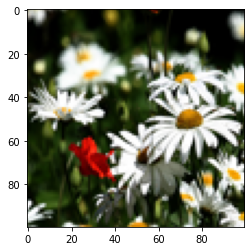

In [49]:
img=xs[5]

img_image=Image.fromarray(np.uint8(img)) #uint=2의 8승까지 표현가능,더 섬세하게 시각화 가능

plt.imshow(img_image)
plt.show()

In [50]:
img

array([[[162., 156., 130.],
        [193., 194., 177.],
        [199., 201., 183.],
        ...,
        [  5.,   9.,   7.],
        [  7.,  10.,   9.],
        [  5.,   8.,   7.]],

       [[179., 179., 160.],
        [204., 206., 197.],
        [199., 202., 194.],
        ...,
        [ 47.,  58.,  55.],
        [ 34.,  42.,  39.],
        [ 36.,  41.,  39.]],

       [[188., 182., 166.],
        [195., 193., 187.],
        [181., 185., 183.],
        ...,
        [117., 128., 125.],
        [ 88.,  99.,  95.],
        [ 89.,  98.,  95.]],

       ...,

       [[180., 191., 176.],
        [148., 158., 150.],
        [ 78.,  90.,  78.],
        ...,
        [247., 249., 251.],
        [232., 232., 229.],
        [237., 228., 201.]],

       [[ 55.,  69.,  41.],
        [ 30.,  45.,  21.],
        [ 19.,  33.,  12.],
        ...,
        [245., 245., 246.],
        [247., 247., 248.],
        [247., 248., 251.]],

       [[ 83.,  94.,  76.],
        [ 90., 104.,  90.],
        [123., 1